<a href="https://colab.research.google.com/github/iimustafa/T5-TuwaiqCompetition/blob/main/T5-TuwaiqCompetition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install translatepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 814.4/814.4 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 6.1 MB/s eta 0:00:00
  Created wheel for safeIO: filename=safeIO-1.2-py3-none-any.whl size=6732 sha256=227849cc8cbb64277f445bdd7b14424b50b5889b2227bec2b7b65812094c4231
  Stored in directory: /root/.cache/pip/wheels/65/77/55/49296e806480db1fa92548fe2eb7447048830f14dbf3e34940
Successfully built safeIO


In [2]:
import pandas as pd
from datetime import datetime
from translatepy import Translator
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from scipy.stats import randint
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
#train_data

In [5]:
print(train_data.duplicated().sum())
print(test_data.duplicated().sum())
#data[data.duplicated()]
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

48
4


In [6]:
print(train_data.shape)
print(test_data.shape)

(6500, 24)
(814, 23)


In [7]:
train_data.isnull().sum()

Student ID                           0
Age                                 87
Gender                               0
Home Region                          2
Home City                            2
Program ID                           0
Program Main Category Code           0
Program Sub Category Code          920
Technology Type                   2958
Program Skill Level               1645
Program Presentation Method          0
Program Start Date                   0
Program End Date                     0
Program Days                         0
Completed Degree                     0
Level of Education                  22
Education Speaciality              272
College                           3862
University Degree Score             76
University Degree Score System      76
Employment Status                  557
Job Type                          4535
Still Working                     4535
Y                                    0
dtype: int64

In [8]:
test_data.isnull().sum()

Student ID                          0
Age                                14
Gender                              0
Home Region                         1
Home City                           1
Program ID                          0
Program Main Category Code          0
Program Sub Category Code         113
Technology Type                   363
Program Skill Level               200
Program Presentation Method         0
Program Start Date                  0
Program End Date                    0
Program Days                        0
Completed Degree                    0
Level of Education                  3
Education Speaciality              37
College                           490
University Degree Score            11
University Degree Score System     11
Employment Status                  70
Job Type                          578
Still Working                     578
dtype: int64

In [9]:
train_data['University Degree Score System'].fillna(5, inplace=True)
train_data['University Degree Score'].fillna(round(train_data[train_data['University Degree Score System'] == 5]['University Degree Score'].mean(),2), inplace=True)
# ============================
test_data['University Degree Score System'].fillna(5, inplace=True)
test_data['University Degree Score'].fillna(round(test_data[test_data['University Degree Score System'] == 5]['University Degree Score'].mean(),2), inplace=True)


In [10]:
train_data.dropna(subset=['Home Region','Home City'], inplace=True)
#===========================
test_data.dropna(subset=['Home Region','Home City'], inplace=True)

In [11]:
train_data['Program Start Date'] = pd.to_datetime(train_data['Program Start Date'])
train_data['Program End Date'] = pd.to_datetime(train_data['Program End Date'])
train_data['Start_year'] = train_data['Program Start Date'].dt.year
train_data['Start_month'] = train_data['Program Start Date'].dt.month
train_data['Start_day'] = train_data['Program Start Date'].dt.day
train_data['End_year'] = train_data['Program End Date'].dt.year
train_data['End_month'] = train_data['Program End Date'].dt.month
train_data['End_day'] = train_data['Program End Date'].dt.day
train_data.drop(['Program Start Date', 'Program End Date'], axis=1, inplace=True)

#======================================

test_data['Program Start Date'] = pd.to_datetime(test_data['Program Start Date'])
test_data['Program End Date'] = pd.to_datetime(test_data['Program End Date'])
test_data['Start_year'] = test_data['Program Start Date'].dt.year
test_data['Start_month'] = test_data['Program Start Date'].dt.month
test_data['Start_day'] = test_data['Program Start Date'].dt.day
test_data['End_year'] = test_data['Program End Date'].dt.year
test_data['End_month'] = test_data['Program End Date'].dt.month
test_data['End_day'] = test_data['Program End Date'].dt.day
test_data.drop(['Program Start Date', 'Program End Date'], axis=1, inplace=True)

In [12]:
print(train_data[train_data['Program Main Category Code'] == 'CAUF']['Program Sub Category Code'].isnull().sum())
print(train_data[train_data['Program Main Category Code'] == 'CAUF']['Program Sub Category Code'].value_counts())
mode = train_data[train_data['Program Main Category Code'] == 'CAUF']['Program Sub Category Code'].mode()[0]
train_data.loc[train_data['Program Main Category Code'] == 'CAUF', 'Program Sub Category Code'] = train_data[train_data['Program Main Category Code'] == 'CAUF']['Program Sub Category Code'].fillna(mode)

#==================================

print(test_data[test_data['Program Main Category Code'] == 'CAUF']['Program Sub Category Code'].isnull().sum())
print(test_data[test_data['Program Main Category Code'] == 'CAUF']['Program Sub Category Code'].value_counts())
mode = test_data[test_data['Program Main Category Code'] == 'CAUF']['Program Sub Category Code'].mode()[0]
test_data.loc[test_data['Program Main Category Code'] == 'CAUF', 'Program Sub Category Code'] = test_data[test_data['Program Main Category Code'] == 'CAUF']['Program Sub Category Code'].fillna(mode)


284
Program Sub Category Code
SWPS    1693
CRDP     243
ERST     135
Name: count, dtype: int64
31
Program Sub Category Code
SWPS    208
CRDP     23
ERST     21
Name: count, dtype: int64


In [13]:
print(train_data[train_data['Program Main Category Code'] == 'APMR']['Program Sub Category Code'].isnull().sum())
print(train_data[train_data['Program Main Category Code'] == 'APMR']['Program Sub Category Code'].value_counts())
mode = train_data[train_data['Program Main Category Code'] == 'APMR']['Program Sub Category Code'].mode()[0]
train_data.loc[train_data['Program Main Category Code'] == 'APMR', 'Program Sub Category Code'] = train_data[train_data['Program Main Category Code'] == 'APMR']['Program Sub Category Code'].fillna(mode)

#====================================

print(test_data[test_data['Program Main Category Code'] == 'APMR']['Program Sub Category Code'].isnull().sum())
print(test_data[test_data['Program Main Category Code'] == 'APMR']['Program Sub Category Code'].value_counts())
mode = test_data[test_data['Program Main Category Code'] == 'APMR']['Program Sub Category Code'].mode()[0]
test_data.loc[test_data['Program Main Category Code'] == 'APMR', 'Program Sub Category Code'] = test_data[test_data['Program Main Category Code'] == 'APMR']['Program Sub Category Code'].fillna(mode)

301
Program Sub Category Code
SRTA    698
KLTM    117
SWPS     93
QTDY     49
ASCW     36
Name: count, dtype: int64
43
Program Sub Category Code
SRTA    97
KLTM    15
SWPS     8
QTDY     6
ASCW     3
Name: count, dtype: int64


In [14]:
print(train_data[train_data['Program Main Category Code'] == 'TOSL']['Program Sub Category Code'].isnull().sum())
print(train_data[train_data['Program Main Category Code'] == 'TOSL']['Program Sub Category Code'].value_counts())
mode = train_data[train_data['Program Main Category Code'] == 'TOSL']['Program Sub Category Code'].mode()[0]
train_data.loc[train_data['Program Main Category Code'] == 'TOSL', 'Program Sub Category Code'] = train_data[train_data['Program Main Category Code'] == 'TOSL']['Program Sub Category Code'].fillna(mode)

#==================================

print(test_data[test_data['Program Main Category Code'] == 'TOSL']['Program Sub Category Code'].isnull().sum())
print(test_data[test_data['Program Main Category Code'] == 'TOSL']['Program Sub Category Code'].value_counts())
mode = test_data[test_data['Program Main Category Code'] == 'TOSL']['Program Sub Category Code'].mode()[0]
test_data.loc[test_data['Program Main Category Code'] == 'TOSL', 'Program Sub Category Code'] = test_data[test_data['Program Main Category Code'] == 'TOSL']['Program Sub Category Code'].fillna(mode)

193
Program Sub Category Code
TOSL    294
Name: count, dtype: int64
23
Program Sub Category Code
TOSL    32
Name: count, dtype: int64


In [15]:
print(train_data[train_data['Program Main Category Code'] == 'ABIR']['Program Sub Category Code'].isnull().sum())
print(train_data[train_data['Program Main Category Code'] == 'ABIR']['Program Sub Category Code'].value_counts())
mode = train_data[train_data['Program Main Category Code'] == 'ABIR']['Program Sub Category Code'].mode()[0]
train_data.loc[train_data['Program Main Category Code'] == 'ABIR', 'Program Sub Category Code'] = train_data[train_data['Program Main Category Code'] == 'ABIR']['Program Sub Category Code'].fillna(mode)

#====================================

print(test_data[test_data['Program Main Category Code'] == 'ABIR']['Program Sub Category Code'].isnull().sum())
print(test_data[test_data['Program Main Category Code'] == 'ABIR']['Program Sub Category Code'].value_counts())
mode = test_data[test_data['Program Main Category Code'] == 'ABIR']['Program Sub Category Code'].mode()[0]
test_data.loc[test_data['Program Main Category Code'] == 'ABIR', 'Program Sub Category Code'] = test_data[test_data['Program Main Category Code'] == 'ABIR']['Program Sub Category Code'].fillna(mode)


78
Program Sub Category Code
INFA    106
ABIR     19
Name: count, dtype: int64
9
Program Sub Category Code
INFA    14
Name: count, dtype: int64


In [16]:
#DTFH, QWLM no mode so i fill same value
train_data.loc[train_data['Program Main Category Code'] == 'DTFH', 'Program Sub Category Code'] = train_data[train_data['Program Main Category Code'] == 'DTFH']['Program Sub Category Code'].fillna('DTFH')
train_data.loc[train_data['Program Main Category Code'] == 'QWLM', 'Program Sub Category Code'] = train_data[train_data['Program Main Category Code'] == 'QWLM']['Program Sub Category Code'].fillna('QWLM')

#=======================


test_data.loc[test_data['Program Main Category Code'] == 'DTFH', 'Program Sub Category Code'] = test_data[test_data['Program Main Category Code'] == 'DTFH']['Program Sub Category Code'].fillna('DTFH')
test_data.loc[test_data['Program Main Category Code'] == 'QWLM', 'Program Sub Category Code'] = test_data[test_data['Program Main Category Code'] == 'QWLM']['Program Sub Category Code'].fillna('QWLM')

In [17]:
#train_data['Level of Education'].fillna(train_data['Level of Education'].mode()[0], inplace=True)

In [18]:
# non_tech_zero = train_data[train_data['Non-technical'] == 1]
# unique_education = non_tech_zero['Education Speaciality'].unique()
# print(unique_education)

In [19]:
tran = Translator()
train_data['Education Speaciality'] = train_data['Education Speaciality'].apply(lambda x: tran.translate(x, 'English').result if isinstance(x,str) else x)
train_data['Education Speaciality'] = train_data['Education Speaciality'].apply(lambda x: tran.translate(x, 'Arabic').result if isinstance(x,str) else x)

#============================

tran = Translator()
test_data['Education Speaciality'] = test_data['Education Speaciality'].apply(lambda x: tran.translate(x, 'English').result if isinstance(x,str) else x)
test_data['Education Speaciality'] = test_data['Education Speaciality'].apply(lambda x: tran.translate(x, 'Arabic').result if isinstance(x,str) else x)

In [20]:
scince_majors = ['رياضيات','فيزياء','احصاء','كيمياء','Biology','احياء','Mathematical',
                 'العلوم في الرياضيات','علوم تطبيقية','الجغرافيا','الأحياء','جغرافيا','اجتماعيات', 'الرياضيات',
                 'مختبرات ', 'رياضيات','جيولوجيا','إحصاء']

# for major in scince_majors:
#     train_data.loc[train_data['Education Speaciality'] == major, 'College'] = train_data.loc[train_data['Education Speaciality'] == major, 'College'].fillna('العلوم الطبيعية والرياضيات والإحصاء')


for i in range(len(train_data)):
    major = str(train_data['Education Speaciality'].iloc[i]).lower()
    if any(word in major for word in scince_majors):
        train_data['College'].iloc[i] = 'العلوم الطبيعية والرياضيات والإحصاء'


#======================================

for i in range(len(test_data)):
    major = str(test_data['Education Speaciality'].iloc[i]).lower()
    if any(word in major for word in scince_majors):
        test_data['College'].iloc[i] = 'العلوم الطبيعية والرياضيات والإحصاء'

In [21]:
Administration_majors = ['نظم المعلومات الإدارية','إدارة الأعمال','الأنظمة','العلوم الإدارية','المحاماة','الموارد البشرية','التمويل والاستثمار','الشريعة','المحاسبة','التسويق',
                        'تسويق ومبيعات','ادارة اعمال','دراسات وقضايا معاصرة', 'حقوق','المالية', 'mba', 'business','سكرتير',
                         'human', 'موارد', 'الموارد', 'الشريعة', 'شريعة', 'الأعمال', 'إدارة','الاداره', 'finance', 'PMP','القرارات',
                         'نظم المعلومات الإدارية', 'المحاماة', 'قانون', 'القانون', 'بشرية', 'البشرية', 'اعمال',
                         'اعمال', 'الاستشارات', 'إعمال', 'الإدارية', 'emba', 'accounting','تسويق', 'ماليه','مالية']

# for major in scince_majors:
#     train_data.loc[train_data['Education Speaciality'] == major, 'College'] = train_data.loc[train_data['Education Speaciality'] == major, 'College'].fillna('الأعمال والإدارة والقانون')
# train_data[train_data['College']== 'الأعمال والإدارة والقانون']['Education Speaciality'].value_counts()


for i in range(len(train_data)):
    major = str(train_data['Education Speaciality'].iloc[i]).lower()
    if any(word in major for word in Administration_majors):
        train_data['College'].iloc[i] = 'الأعمال والإدارة والقانون'

#==========================

for i in range(len(test_data)):
    major = str(test_data['Education Speaciality'].iloc[i]).lower()
    if any(word in major for word in Administration_majors):
        test_data['College'].iloc[i] = 'الأعمال والإدارة والقانون'


In [22]:
Eng_majors = ['electrical engineer', 'ميكانيكية', 'صيانة الالات الصناعية',
                         'هندسة طيران وفضاء', 'هياكل ومحركات', 'الصناعية','كهربائية',
                         'هندسه كهربائية', 'هندسة كهربائي', 'كهربائية ', 'civil and environmental engineering',
                         'صناعية', 'الميكانيكية','الاطراف الصناعية والأجهزة المساعدة', 'آلات دقيقة وتحكم',
                         'انشاءات', 'معماريه', 'معمارية', 'تصميم','product','هندسة','الهندسة','engineering'
                         ]

# for major in scince_majors:
#     train_data.loc[train_data['Education Speaciality'] == major, 'College'] = train_data.loc[train_data['Education Speaciality'] == major, 'College'].fillna('الهندسة والتصنيع والبناء')

# train_data[train_data['College']== 'الهندسة والتصنيع والبناء']['Education Speaciality'].value_counts()


for i in range(len(train_data)):
    major = str(train_data['Education Speaciality'].iloc[i]).lower()
    if any(word in major for word in Eng_majors):
        train_data['College'].iloc[i] = 'الهندسة والتصنيع والبناء'


In [23]:
Arts_majors = ['Art','انجليزي','إنجليزي','الإسلامية','الإسلاميه', 'انجليزيه', 'لغات',
               'اللغة', 'العربية', 'اللغات', 'والترجمة', 'الجرافيكس', 'التاريخ',
               'تاريخ', 'الإذاعة', 'الأدب', 'الإسلامية', 'العقيدة', 'الأدب', 'ادب',
               'الحسبة','اسلامية', 'الإسلامية', 'translation','فنون', 'اسلاميه','دين' ,'لغه','لغة']

# for major in scince_majors:
#     train_data.loc[train_data['Education Speaciality'] == major, 'College'] = train_data.loc[train_data['Education Speaciality'] == major, 'College'].fillna('الفنون والعلوم الإنسانية')

for i in range(len(train_data)):
    major = str(train_data['Education Speaciality'].iloc[i]).lower()
    if any(word in major for word in Arts_majors):
        train_data['College'].iloc[i] = 'الفنون والعلوم الإنسانية'


#===================================

for i in range(len(test_data)):
    major = str(test_data['Education Speaciality'].iloc[i]).lower()
    if any(word in major for word in Arts_majors):
        test_data['College'].iloc[i] = 'الفنون والعلوم الإنسانية'

#train_data[train_data['College']== 'الفنون والعلوم الإنسانية']['Education Speaciality'].value_counts()

In [24]:
social_science_majors = ['الإعلام', 'الاجتماع', 'الجغرافيا البشرية', 'اقتصاد',
                         'إقتصاد', 'النفس', 'اجتماع','الإقتصاد', 'الإجتماع','relations',
                         'علاقات', 'السياحة','والصحافة'
                         ]

# for major in scince_majors:
#     train_data.loc[train_data['Education Speaciality'] == major, 'College'] = train_data.loc[train_data['Education Speaciality'] == major, 'College'].fillna('العلوم الاجتماعية والصحافة والإعلام')

for i in range(len(train_data)):
    major = str(train_data['Education Speaciality'].iloc[i]).lower()
    if any(word in major for word in social_science_majors):
        train_data['College'].iloc[i] = 'العلوم الاجتماعية والصحافة والإعلام'


#=========================

for i in range(len(test_data)):
    major = str(test_data['Education Speaciality'].iloc[i]).lower()
    if any(word in major for word in social_science_majors):
        test_data['College'].iloc[i] = 'العلوم الاجتماعية والصحافة والإعلام'

#train_data[train_data['College']== 'العلوم الاجتماعية والصحافة والإعلام']['Education Speaciality'].value_counts()

In [25]:
Edu_majors = ['التدريس', 'التربية', 'التربيه', 'الإعاقة', 'التربيه',
              'الإعاقة', 'التربية الإسلامية', 'مناهج', 'تربية', 'التربيه', 'رياض اطفال',
              'أطفال', 'تربيه', 'لغويات','دراسات']

#

# for major in scince_majors:
#     train_data.loc[train_data['Education Speaciality'] == major, 'College'] = train_data.loc[train_data['Education Speaciality'] == major, 'College'].fillna('التعليم')

for i in range(len(train_data)):
    major = str(train_data['Education Speaciality'].iloc[i]).lower()
    if any(word in major for word in Edu_majors):
        train_data['College'].iloc[i] = 'التعليم'

#===============



for i in range(len(test_data)):
    major = str(test_data['Education Speaciality'].iloc[i]).lower()
    if any(word in major for word in Edu_majors):
        test_data['College'].iloc[i] = 'التعليم'


# train_data[train_data['College']== 'التعليم']['Education Speaciality'].value_counts()

In [26]:
Technical_majors = ['حاسب','معلومات','تقنية', 'بيانات', 'cis', 'computer', 'اتصالات','it', 'شبكات','software','رقمي','network','mis','مواقع','cs',
            'برمجيات', 'امن سيبراني','اكترونيات', 'سيبراني', 'لكترونيات','ذكاء','data', 'information', 'technology','communication','حوسب','حاسب'
            ,'كمبيوتر','برمجه','gis','computing','conputer', 'لكتروني','artificial','artifical intelligence','صطناعي','سبراني','تكنولوجيا','ويب','وسائط',
            'برمجة','artifical','web','system','iot','programming','تطوير','multimedia', 'الحاسب', 'الحاسبات', 'تقنيه',
                   'is', 'نظم', 'برمجة','برمجه','السيبراني','سيبراني','cyber','networks','security','تقنية','المعلومات','الاتصالات','والاتصالات','الحاسوب'
                   ,'البيانات','it','الشبكات','سبراني','الاصطناعي','cs','البرمجه','البرمجة','كومبيوتر','الكمبيوتر','حاسوب']

for i in range(len(train_data)):
    major = str(train_data['Education Speaciality'].iloc[i]).lower()
    if any(word in major for word in Technical_majors):
        #train_data['Education Speaciality'].iloc[i] = 'Technical'
        train_data['College'].iloc[i] = 'تكنولوجيا الاتصالات والمعلومات'

    else:
        #train_data['Education Speaciality'].iloc[i] = 'Non-technical'
        pass


#========================

for i in range(len(test_data)):
    major = str(test_data['Education Speaciality'].iloc[i]).lower()
    if any(word in major for word in Technical_majors):
        #test_data['Education Speaciality'].iloc[i] = 'Technical'
        test_data['College'].iloc[i] = 'تكنولوجيا الاتصالات والمعلومات'

    else:
        #test_data['Education Speaciality'].iloc[i] = 'Non-technical'
        pass


In [27]:
#train_data.loc[train_data['Education Speaciality'] == 'Technical', 'College'] = train_data.loc[train_data['Education Speaciality'] == 'Technical', 'College'].fillna('تكنولوجيا الاتصالات والمعلومات')

In [28]:
train_data.isnull().sum()

Student ID                           0
Age                                 86
Gender                               0
Home Region                          0
Home City                            0
Program ID                           0
Program Main Category Code           0
Program Sub Category Code            0
Technology Type                   2958
Program Skill Level               1645
Program Presentation Method          0
Program Days                         0
Completed Degree                     0
Level of Education                  21
Education Speaciality              271
College                            474
University Degree Score              0
University Degree Score System       0
Employment Status                  556
Job Type                          4534
Still Working                     4534
Y                                    0
Start_year                           0
Start_month                          0
Start_day                            0
End_year                 

In [29]:
for id in train_data['Program ID'].unique():
    #print(len(train_data[train_data['Program ID'] == id]['Program Skill Level'].mode()))
    #print(train_data[train_data['Program ID'] == id]['Program Skill Level'].mode())
    if len(train_data[train_data['Program ID'] == id]['Program Skill Level'].mode()) == 0:
        train_data.loc[train_data['Program ID'] == id, 'Program Skill Level'] = train_data.loc[train_data['Program ID'] == id, 'Program Skill Level'].fillna(train_data['Program Skill Level'].mode()[0])

    else:
        train_data.loc[train_data['Program ID'] == id, 'Program Skill Level'] = train_data.loc[train_data['Program ID'] == id, 'Program Skill Level'].fillna(train_data[train_data['Program ID'] == id]['Program Skill Level'].mode()[0])

#=====================

for id in test_data['Program ID'].unique():
    #print(len(test_data[test_data['Program ID'] == id]['Program Skill Level'].mode()))
    #print(test_data[test_data['Program ID'] == id]['Program Skill Level'].mode())
    if len(test_data[test_data['Program ID'] == id]['Program Skill Level'].mode()) == 0:
        test_data.loc[test_data['Program ID'] == id, 'Program Skill Level'] = test_data.loc[test_data['Program ID'] == id, 'Program Skill Level'].fillna(test_data['Program Skill Level'].mode()[0])

    else:
        test_data.loc[test_data['Program ID'] == id, 'Program Skill Level'] = test_data.loc[test_data['Program ID'] == id, 'Program Skill Level'].fillna(test_data[test_data['Program ID'] == id]['Program Skill Level'].mode()[0])



In [30]:
for id in train_data['Program ID'].unique():
    if len(train_data[train_data['Program ID'] == id]['Technology Type'].mode()) == 0:
        train_data.loc[train_data['Program ID'] == id, 'Technology Type'] = train_data.loc[train_data['Program ID'] == id, 'Technology Type'].fillna(train_data['Technology Type'].mode()[0])

    else:
        train_data.loc[train_data['Program ID'] == id, 'Technology Type'] = train_data.loc[train_data['Program ID'] == id, 'Technology Type'].fillna(train_data[train_data['Program ID'] == id]['Technology Type'].mode()[0])


#=======================

for id in test_data['Program ID'].unique():
    if len(test_data[test_data['Program ID'] == id]['Technology Type'].mode()) == 0:
        test_data.loc[test_data['Program ID'] == id, 'Technology Type'] = test_data.loc[test_data['Program ID'] == id, 'Technology Type'].fillna(test_data['Technology Type'].mode()[0])

    else:
        test_data.loc[test_data['Program ID'] == id, 'Technology Type'] = test_data.loc[test_data['Program ID'] == id, 'Technology Type'].fillna(test_data[test_data['Program ID'] == id]['Technology Type'].mode()[0])


In [31]:
train_data.loc[train_data['Employment Status'] == 'موظف','Still Working'] = train_data.loc[train_data['Employment Status'] == 'موظف','Still Working'].fillna('Yes')
train_data.loc[train_data['Employment Status'] == 'غير موظف','Still Working'] = train_data.loc[train_data['Employment Status'] == 'غير موظف','Still Working'].fillna('No')
train_data.loc[train_data['Employment Status'] == 'عمل حر','Still Working'] = train_data.loc[train_data['Employment Status'] == 'عمل حر','Still Working'].fillna('Yes')
train_data.loc[train_data['Employment Status'] == 'طالب','Still Working'] = train_data.loc[train_data['Employment Status'] == 'طالب','Still Working'].fillna('No')
train_data.loc[train_data['Employment Status'] == 'خريج','Still Working'] = train_data.loc[train_data['Employment Status'] == 'خريج','Still Working'].fillna('No')

#============================

test_data.loc[test_data['Employment Status'] == 'موظف','Still Working'] = test_data.loc[test_data['Employment Status'] == 'موظف','Still Working'].fillna('Yes')
test_data.loc[test_data['Employment Status'] == 'غير موظف','Still Working'] = test_data.loc[test_data['Employment Status'] == 'غير موظف','Still Working'].fillna('No')
test_data.loc[test_data['Employment Status'] == 'عمل حر','Still Working'] = test_data.loc[test_data['Employment Status'] == 'عمل حر','Still Working'].fillna('Yes')
test_data.loc[test_data['Employment Status'] == 'طالب','Still Working'] = test_data.loc[test_data['Employment Status'] == 'طالب','Still Working'].fillna('No')
test_data.loc[test_data['Employment Status'] == 'خريج','Still Working'] = test_data.loc[test_data['Employment Status'] == 'خريج','Still Working'].fillna('No')


In [32]:
train_data[train_data['Level of Education'] == 'ثانوي'].isnull().sum()
train_data.loc[train_data['Level of Education'] == 'ثانوي','Education Speaciality'] = train_data.loc[train_data['Level of Education'] == 'ثانوي','Education Speaciality'].fillna('غير متخصص')
train_data.loc[train_data['Level of Education'] == 'ثانوي','College'] = train_data.loc[train_data['Level of Education'] == 'ثانوي','College'].fillna('لايوجد')
train_data.loc[train_data['Level of Education'] == 'ثانوي','Employment Status'] = train_data.loc[train_data['Level of Education'] == 'ثانوي','Employment Status'].fillna('طالب')
train_data.loc[train_data['Level of Education'] == 'ثانوي','Still Working'] = train_data.loc[train_data['Level of Education'] == 'ثانوي','Still Working'].fillna('No')
train_data.loc[train_data['Level of Education'] == 'ثانوي','Job Type'] = train_data.loc[train_data['Level of Education'] == 'ثانوي','Job Type'].fillna('دوام كامل')


#==========================


test_data.loc[test_data['Employment Status'] == 'موظف','Still Working'] = test_data.loc[test_data['Employment Status'] == 'موظف','Still Working'].fillna('Yes')
test_data.loc[test_data['Employment Status'] == 'غير موظف','Still Working'] = test_data.loc[test_data['Employment Status'] == 'غير موظف','Still Working'].fillna('No')
test_data.loc[test_data['Employment Status'] == 'عمل حر','Still Working'] = test_data.loc[test_data['Employment Status'] == 'عمل حر','Still Working'].fillna('Yes')
test_data.loc[test_data['Employment Status'] == 'طالب','Still Working'] = test_data.loc[test_data['Employment Status'] == 'طالب','Still Working'].fillna('No')
test_data.loc[test_data['Employment Status'] == 'خريج','Still Working'] = test_data.loc[test_data['Employment Status'] == 'خريج','Still Working'].fillna('No')


In [33]:
#train_data[train_data['College'].isnull()]['Education Speaciality'].unique()

In [34]:
#train_data.dropna(subset = ['Level of Education'], inplace = True)

In [35]:
train_data.loc[train_data['Completed Degree'] == 'نعم','Employment Status'] = train_data.loc[train_data['Completed Degree'] == 'نعم','Employment Status'].fillna('موظف')
train_data.loc[train_data['Completed Degree'] == 'لا','Employment Status'] = train_data.loc[train_data['Completed Degree'] == 'لا','Employment Status'].fillna('طالب')

#==========================

test_data.loc[test_data['Completed Degree'] == 'نعم','Employment Status'] = test_data.loc[test_data['Completed Degree'] == 'نعم','Employment Status'].fillna('موظف')
test_data.loc[test_data['Completed Degree'] == 'لا','Employment Status'] = test_data.loc[test_data['Completed Degree'] == 'لا','Employment Status'].fillna('طالب')


In [36]:
#train_data['Employment Status'].value_counts()

In [37]:
train_data.loc[train_data['Employment Status'] == 'موظف','Still Working'] = train_data.loc[train_data['Employment Status'] == 'موظف','Still Working'].fillna('Yes')
train_data.loc[(train_data['Employment Status'] == 'غير موظف') | (train_data['Employment Status'] == 'طالب') | (train_data['Employment Status'] == 'عمل حر'),'Still Working'] =train_data.loc[(train_data['Employment Status'] == 'غير موظف') | (train_data['Employment Status'] == 'طالب') | (train_data['Employment Status'] == 'عمل حر'),'Still Working'].fillna('No')

#================================

test_data.loc[test_data['Employment Status'] == 'موظف','Still Working'] = test_data.loc[test_data['Employment Status'] == 'موظف','Still Working'].fillna('Yes')
test_data.loc[(test_data['Employment Status'] == 'غير موظف') | (test_data['Employment Status'] == 'طالب') | (test_data['Employment Status'] == 'عمل حر'),'Still Working'] =test_data.loc[(test_data['Employment Status'] == 'غير موظف') | (test_data['Employment Status'] == 'طالب') | (test_data['Employment Status'] == 'عمل حر'),'Still Working'].fillna('No')

In [38]:
#train_data['Job Type'].value_counts()

In [39]:
train_data.loc[(train_data['Still Working'] == 'Yes') | (train_data['Employment Status'] == 'طالب') ,'Job Type'] = train_data.loc[(train_data['Still Working'] == 'Yes') | (train_data['Employment Status'] == 'طالب') ,'Job Type'].fillna('دوام كامل')

#========================

test_data.loc[(test_data['Still Working'] == 'Yes') | (test_data['Employment Status'] == 'طالب') ,'Job Type'] = test_data.loc[(test_data['Still Working'] == 'Yes') | (test_data['Employment Status'] == 'طالب') ,'Job Type'].fillna('دوام كامل')


In [40]:
#train_data[train_data['Job Type'].isnull()]

In [41]:
#train_data.loc[(train_data['Still Working'] == 'Yes') ,'Job Type']

In [42]:
#train_data['Level of Education'].value_counts()

In [43]:
#train_data.isnull().sum()

In [44]:
#train_data['Education Speaciality'].unique()

In [45]:
train_data.loc[(train_data['Education Speaciality']== 'غير متخصص'),'College'] = train_data.loc[(train_data['Education Speaciality']== 'غير متخصص'),'College'].fillna('غير متخصص')
#| (train_data['Level of Education'] == 'ثانوي')

#==============================

test_data.loc[(test_data['Education Speaciality']== 'غير متخصص'),'College'] = test_data.loc[(test_data['Education Speaciality']== 'غير متخصص'),'College'].fillna('غير متخصص')



In [46]:
#train_data['Level of Education'].value_counts()

In [47]:
train_data.dropna(subset = ['College','Age'], inplace = True)

#==========================

test_data.dropna(subset = ['College','Age'], inplace = True)

In [48]:
# train_data.isnull().sum()
# test_data.isnull().sum()

In [49]:
train_data.loc[(train_data['Still Working'] == 'No'),'Job Type'] = train_data.loc[(train_data['Still Working'] == 'No'),'Job Type'].fillna('لا يعمل')

#===================

test_data.loc[(test_data['Still Working'] == 'No'),'Job Type'] = test_data.loc[(test_data['Still Working'] == 'No'),'Job Type'].fillna('لا يعمل')

In [50]:
#train_data.info()

In [51]:
Technical_majors = ['حاسب','معلومات','تقنية', 'بيانات', 'cis', 'computer', 'اتصالات','it', 'شبكات','software','رقمي','network','mis','مواقع','cs',
            'برمجيات', 'امن سيبراني','اكترونيات', 'سيبراني', 'لكترونيات','ذكاء','data', 'information', 'technology','communication','حوسب','حاسب'
            ,'كمبيوتر','برمجه','gis','computing','conputer', 'لكتروني','artificial','artifical intelligence','صطناعي','سبراني','تكنولوجيا','ويب','وسائط',
            'برمجة','artifical','web','system','iot','programming','تطوير','multimedia', 'الحاسب', 'الحاسبات', 'تقنيه',
                   'is', 'نظم', 'برمجة','برمجه','السيبراني','سيبراني','cyber','networks','security','تقنية','المعلومات','الاتصالات','والاتصالات','الحاسوب'
                   ,'البيانات','it','الشبكات','سبراني','الاصطناعي','cs','البرمجه','البرمجة','كومبيوتر','الكمبيوتر','حاسوب']

for i in range(len(train_data)):
    major = str(train_data['Education Speaciality'].iloc[i]).lower()
    if any(word in major for word in Technical_majors):
        train_data['Education Speaciality'].iloc[i] = 'Technical'
    else:
        train_data['Education Speaciality'].iloc[i] = 'Non-technical'
        pass

#===============================

for i in range(len(test_data)):
    major = str(test_data['Education Speaciality'].iloc[i]).lower()
    if any(word in major for word in Technical_majors):
        test_data['Education Speaciality'].iloc[i] = 'Technical'
    else:
        test_data['Education Speaciality'].iloc[i] = 'Non-technical'
        pass


In [52]:
train_data['Age'] = train_data['Age'].astype(int)
train_data['University Degree Score System'] = train_data['University Degree Score System'].astype(int)
for column in train_data.select_dtypes('object').columns.drop(['Student ID','Program ID']):
    train_data[column] = train_data[column].astype('category')

#======================

test_data['Age'] = test_data['Age'].astype(int)
test_data['University Degree Score System'] = test_data['University Degree Score System'].astype(int)
for column in test_data.select_dtypes('object').columns.drop(['Student ID','Program ID']):
    test_data[column] = test_data[column].astype('category')


In [53]:
numeric = train_data.select_dtypes('number').columns
numeric = numeric.drop('Y')
cat = train_data.select_dtypes('category').columns
subCat = ['Program Skill Level', 'Home Region' , 'Home City' , 'Program Main Category Code', 'Program Sub Category Code' , 'College']

In [54]:
scaler = MinMaxScaler()
train_data[numeric] = scaler.fit_transform(train_data[numeric])

#=======================

test_data[numeric] = scaler.fit_transform(test_data[numeric])

In [55]:
One = OneHotEncoder()
Ordinal = OrdinalEncoder()
col = cat.drop(subCat)

encoded_features_train = One.fit_transform(train_data[col])
train_data[subCat] = Ordinal.fit_transform(train_data[subCat])

#==================================

encoded_features_test = One.fit_transform(test_data[col])
test_data[subCat] = Ordinal.fit_transform(test_data[subCat])


In [56]:
print(encoded_features_train.shape)
print(encoded_features_test.shape)

(6214, 29)
(742, 29)


In [57]:
encoded_train = pd.DataFrame(encoded_features_train.toarray(), columns=One.get_feature_names_out(col), index=train_data.index)

#===========================

encoded_test = pd.DataFrame(encoded_features_test.toarray(), columns=One.get_feature_names_out(col), index=test_data.index)

In [58]:
train_data_encoded = pd.concat([train_data.drop(columns=col), encoded_train], axis=1)
#=======================
test_data_encoded = pd.concat([test_data.drop(columns=col), encoded_test], axis=1)


In [59]:
train_data_encoded.drop(columns = ['Student ID','Program ID'],inplace =True)
#==============================
test_data_encoded.drop(columns = ['Student ID','Program ID'],inplace =True)

In [60]:
train_data.isnull().sum()

Student ID                        0
Age                               0
Gender                            0
Home Region                       0
Home City                         0
Program ID                        0
Program Main Category Code        0
Program Sub Category Code         0
Technology Type                   0
Program Skill Level               0
Program Presentation Method       0
Program Days                      0
Completed Degree                  0
Level of Education                0
Education Speaciality             0
College                           0
University Degree Score           0
University Degree Score System    0
Employment Status                 0
Job Type                          0
Still Working                     0
Y                                 0
Start_year                        0
Start_month                       0
Start_day                         0
End_year                          0
End_month                         0
End_day                     

In [61]:
test_data.isnull().sum()

Student ID                        0
Age                               0
Gender                            0
Home Region                       0
Home City                         0
Program ID                        0
Program Main Category Code        0
Program Sub Category Code         0
Technology Type                   0
Program Skill Level               0
Program Presentation Method       0
Program Days                      0
Completed Degree                  0
Level of Education                0
Education Speaciality             0
College                           0
University Degree Score           0
University Degree Score System    0
Employment Status                 0
Job Type                          0
Still Working                     0
Start_year                        0
Start_month                       0
Start_day                         0
End_year                          0
End_month                         0
End_day                           0
dtype: int64

In [62]:
X = train_data_encoded.drop(columns = 'Y')
y = train_data_encoded['Y']
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2 , random_state = 123)

In [63]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [64]:
y_hat = LR.predict(X_val)
accuracy_score(y_val,y_hat )

0.8567980691874497

In [65]:
print(classification_report(y_val,y_hat))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1054
           1       0.54      0.38      0.45       189

    accuracy                           0.86      1243
   macro avg       0.72      0.66      0.68      1243
weighted avg       0.84      0.86      0.85      1243



In [66]:
#pridect
#LR.predict(test_data_encoded)

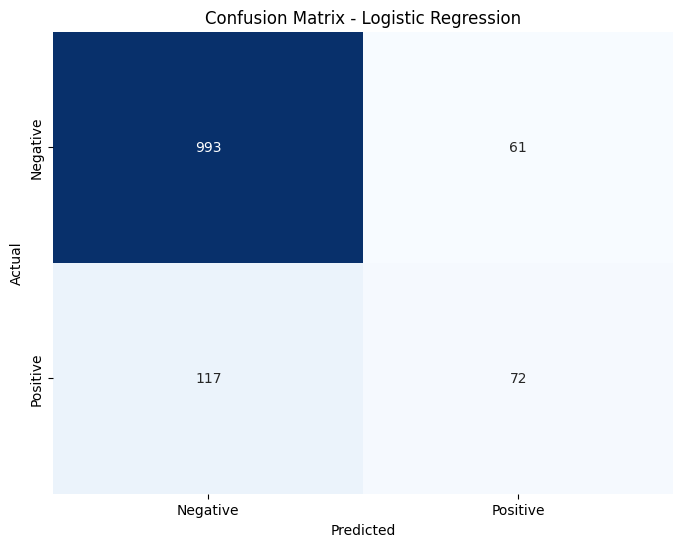

In [67]:
conf_matrix_lr = confusion_matrix(y_val, y_hat)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [68]:
rfclf = RandomForestClassifier()
rfclf.fit(X_train,y_train)
y_hat = rfclf.predict(X_val)
accuracy_score(y_val,y_hat)

0.8777152051488335

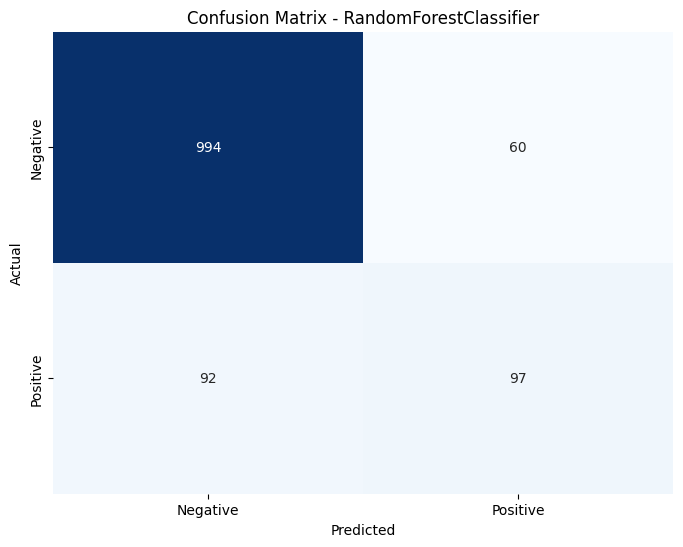

In [69]:
conf_matrix_lr = confusion_matrix(y_val, y_hat)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix - RandomForestClassifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [70]:
param_grid = {
    'n_estimators': randint(10, 30),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False]
}
grid = RandomizedSearchCV(rfclf, param_distributions=param_grid, random_state=42)
grid.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b848f3dbca0>,
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b848f3dadd0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b848faab8b0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b848f337430>},
                   random_state=42)

In [71]:
print(grid.best_params_)
print(grid.best_score_)

{'bootstrap': True, 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 28}
0.8839258667583391


In [72]:
y_test = rfclf.predict(test_data_encoded)

In [73]:
#y_test

In [74]:
print(classification_report(y_val,y_hat))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1054
           1       0.62      0.51      0.56       189

    accuracy                           0.88      1243
   macro avg       0.77      0.73      0.74      1243
weighted avg       0.87      0.88      0.87      1243



In [75]:
SVM = SVC()
SVM.fit(X_train,y_train)
y_hat = SVM.predict(X_val)
accuracy_score(y_val,y_hat)

0.8479485116653258

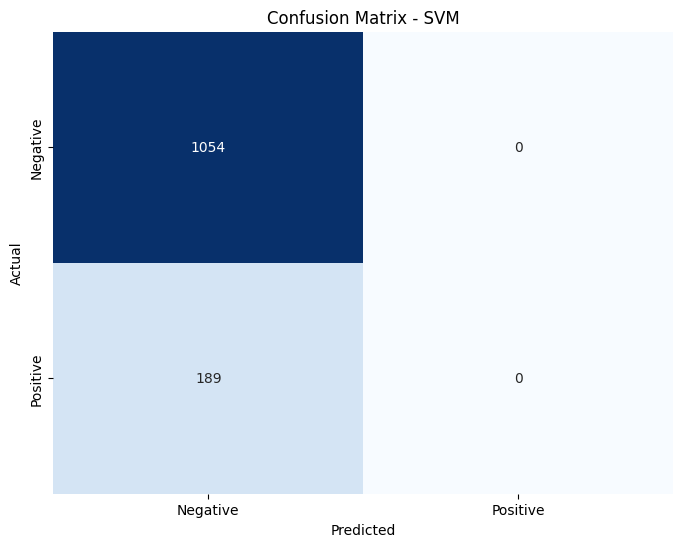

In [76]:
conf_matrix_lr = confusion_matrix(y_val, y_hat)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [77]:
print(classification_report(y_val,y_hat))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1054
           1       0.00      0.00      0.00       189

    accuracy                           0.85      1243
   macro avg       0.42      0.50      0.46      1243
weighted avg       0.72      0.85      0.78      1243



In [78]:
prediction = rfclf.predict(test_data_encoded)

In [79]:
pd.DataFrame(prediction, columns=['predictions']).to_csv('prediction.csv')